<a href="https://colab.research.google.com/github/jingxuchen19/ECON5200-Applied-Data-Analytics-in-Economics/blob/main/Class%203/%20Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Economies: JPN (Japan), HIC (High Income), WLD (World)
country_codes = ['JPN', 'HIC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [47]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract Japan for specific calculations
df_jpn = df.xs('JPN', axis=1, level=0).copy()

Fetching data...


In [48]:
df

economy           HIC                                                          \
series  Inflation_CPI Tax_Rev_GDP Gov_Exp_GDP Exports_GDP Gross_Cap_Formation   
Year                                                                            
2000         2.719440   16.828100   16.333124   23.227993           24.348870   
2001         2.627413   16.294610   16.759889   22.642234           23.246449   
2002         2.116284   15.122801   17.256571   22.584829           22.394988   
2003         2.065371   14.852712   17.594273   23.188808           22.335517   
2004         2.206737   14.878331   17.514063   24.919987           22.787157   
2005         2.658485   15.638293   17.426143   26.163616           23.231927   
2006         2.720048   16.057098   17.330563   27.947852           23.739321   
2007         2.852898   16.165334   17.326589   29.235457           23.885025   
2008         4.669008   15.574606   17.869717   30.707396           23.418559   
2009         1.615105   13.920199   19.161133   26.526899           20.326782   
2010         2.133720   14.117987   18.791446   29.261784           21.156957   
2011         3.413745   14.515372   18.448435   31.604420           21.701864   
2012         2.710119   14.708142   18.206758   31.623383           21.666812   
2013         1.504723   15.100851   18.085463   32.095306           21.602727   
2014         1.041196   15.283602   17.879511   32.196706           21.946057   
2015         0.330027   15.298078   17.522740   30.690172           22.233770   
2016         0.394769   15.161949   17.460322   29.776113           22.057444   
2017         1.589094   15.548539   17.229720   30.984722           22.412058   
2018         1.881108   15.129848   17.227081   31.868134           22.659492   
2019         1.615200   15.061653   17.384979   31.009827           22.921942   
2020         0.598986   15.025896   18.848867   28.640567           22.665529   
2021         2.518371   15.960144   18.208200   31.439224           23.077264   
2022         7.531078   16.524959   17.425438   34.008689           23.618205   
2023         4.856040   15.214210         NaN   32.119832           22.995275   
2024         2.385548         NaN         NaN   31.710750           22.662400   

economy                                                                   \
series  Imports_GDP     GDP_Const GDP_Per_Capita_Const Gross_Dom_Savings   
Year                                                                       
2000      23.309949  3.786938e+13         30158.070078         24.237538   
2001      22.728255  3.847025e+13         30481.297187         23.110709   
2002      22.555891  3.910074e+13         30822.944048         22.388186   
2003      23.179588  3.999863e+13         31366.542132         22.291108   
2004      24.809625  4.140460e+13         32292.646997         22.875159   
2005      26.203301  4.264753e+13         33082.517795         23.174040   
2006      28.008537  4.402978e+13         33950.239704         23.688419   
2007      29.106903  4.530163e+13         34698.518434         24.068957   
2008      30.596536  4.561384e+13         34696.011596         23.499717   
2009      25.891344  4.408696e+13         33329.676736         20.918217   
2010      28.461397  4.543015e+13         34192.514661         21.951958   
2011      30.550451  4.635489e+13         34734.275440         22.772568   
2012      30.314491  4.704236e+13         35042.734140         22.991462   
2013      30.535945  4.780163e+13         35404.681044         23.111563   
2014      30.743470  4.883280e+13         35972.696457         23.321763   
2015      29.539324  4.997757e+13         36586.434690         23.233070   
2016      28.595568  5.090020e+13         37037.602190         23.072412   
2017      29.677570  5.217122e+13         37796.468988         23.506930   
2018      30.468253  5.341426e+13         38563.376923         23.887849   
2019      29.922577  5.442623e+13         39162.034955     

In [49]:
# Natural Rate of Unemployment (5-Year MA)
df_jpn['Natural_Rate_Unemp'] = df_jpn['Unemployment_Rate'].rolling(window=5).mean()

# Productivity (Output per Worker)
df_jpn['Productivity'] = df_jpn['GDP_Const'] / df_jpn['Labor_Force_Total']

# Net Capital Outflow (Exports - Imports)
df_jpn['NCO'] = df_jpn['Exports_GDP'] - df_jpn['Imports_GDP']

# Budget Balance (Tax - Spending)
df_jpn['Budget_Balance'] = df_jpn['Tax_Rev_GDP'] - df_jpn['Gov_Exp_GDP']

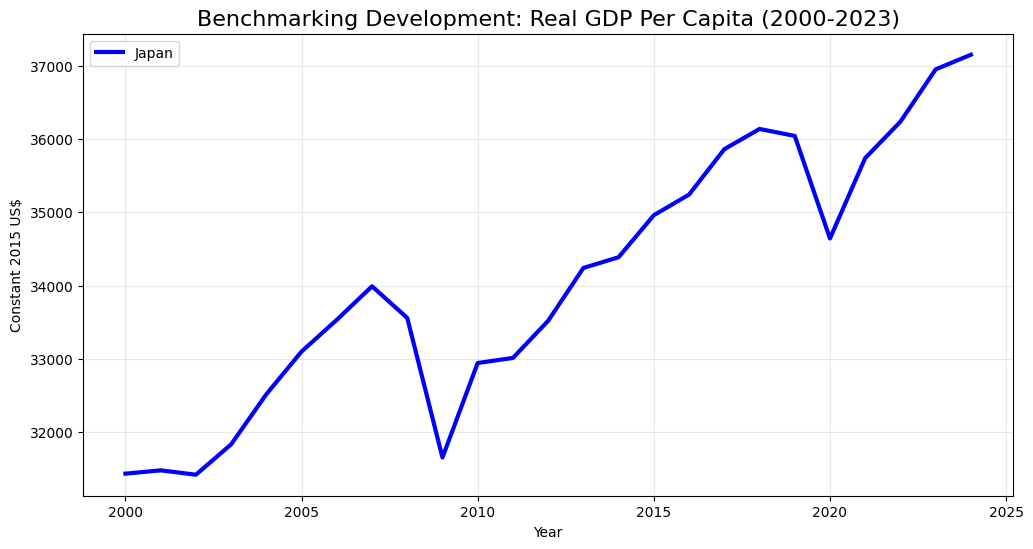

In [50]:
plt.figure(figsize=(12, 6))
# Plot ONLY Japan
plt.plot(df.index, df[('JPN', 'GDP_Per_Capita_Const')], label='Japan', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

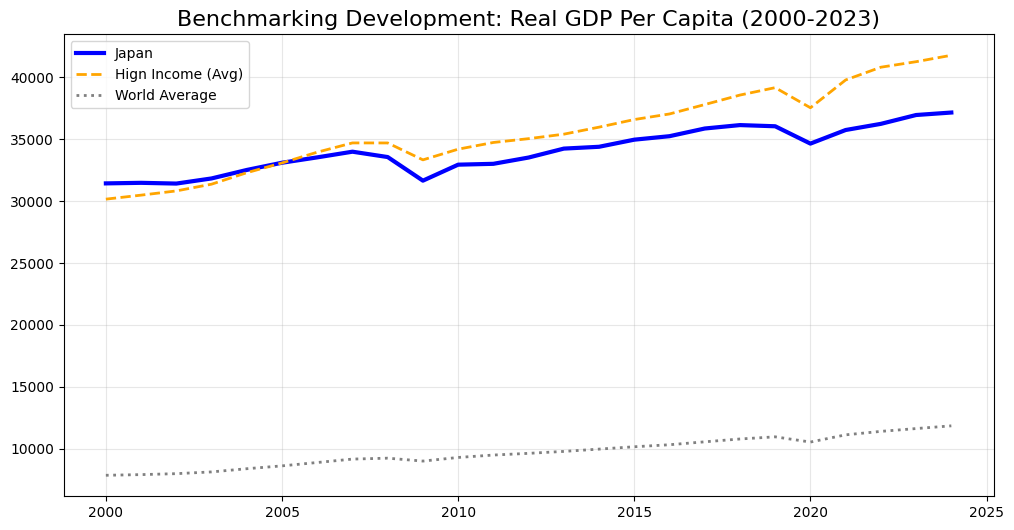

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('JPN', 'GDP_Per_Capita_Const')], label='Japan', color='blue', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('HIC', 'GDP_Per_Capita_Const')], label='Hign Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

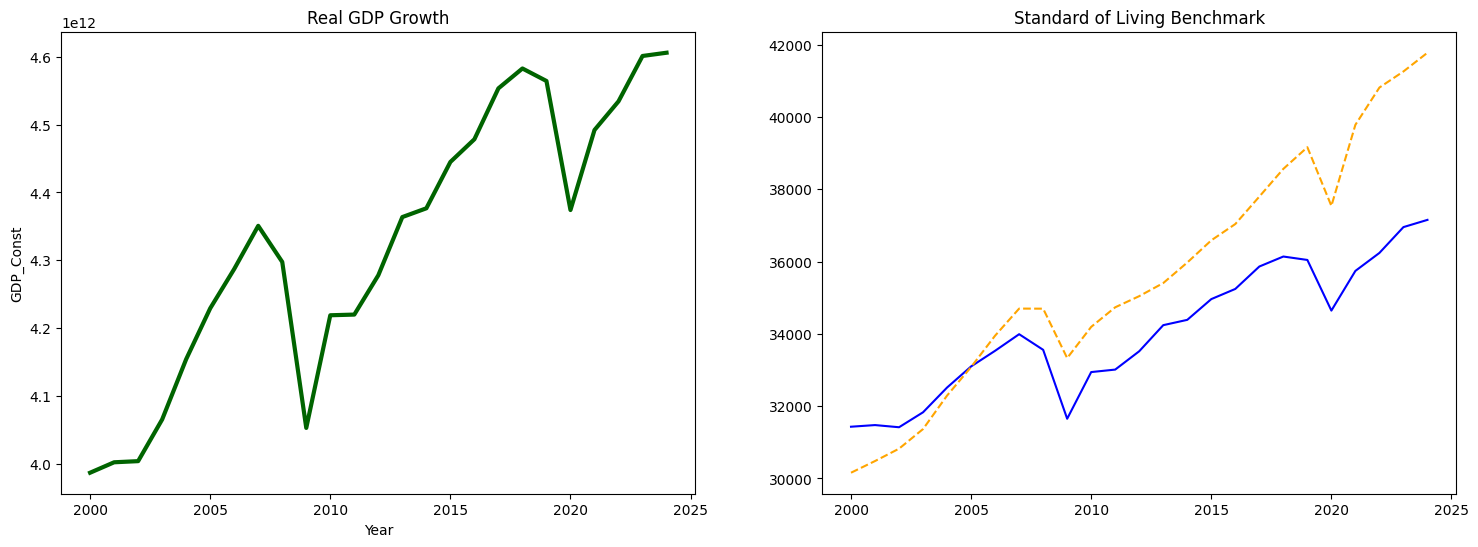

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_jpn, x=df_jpn.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('JPN', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('HIC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

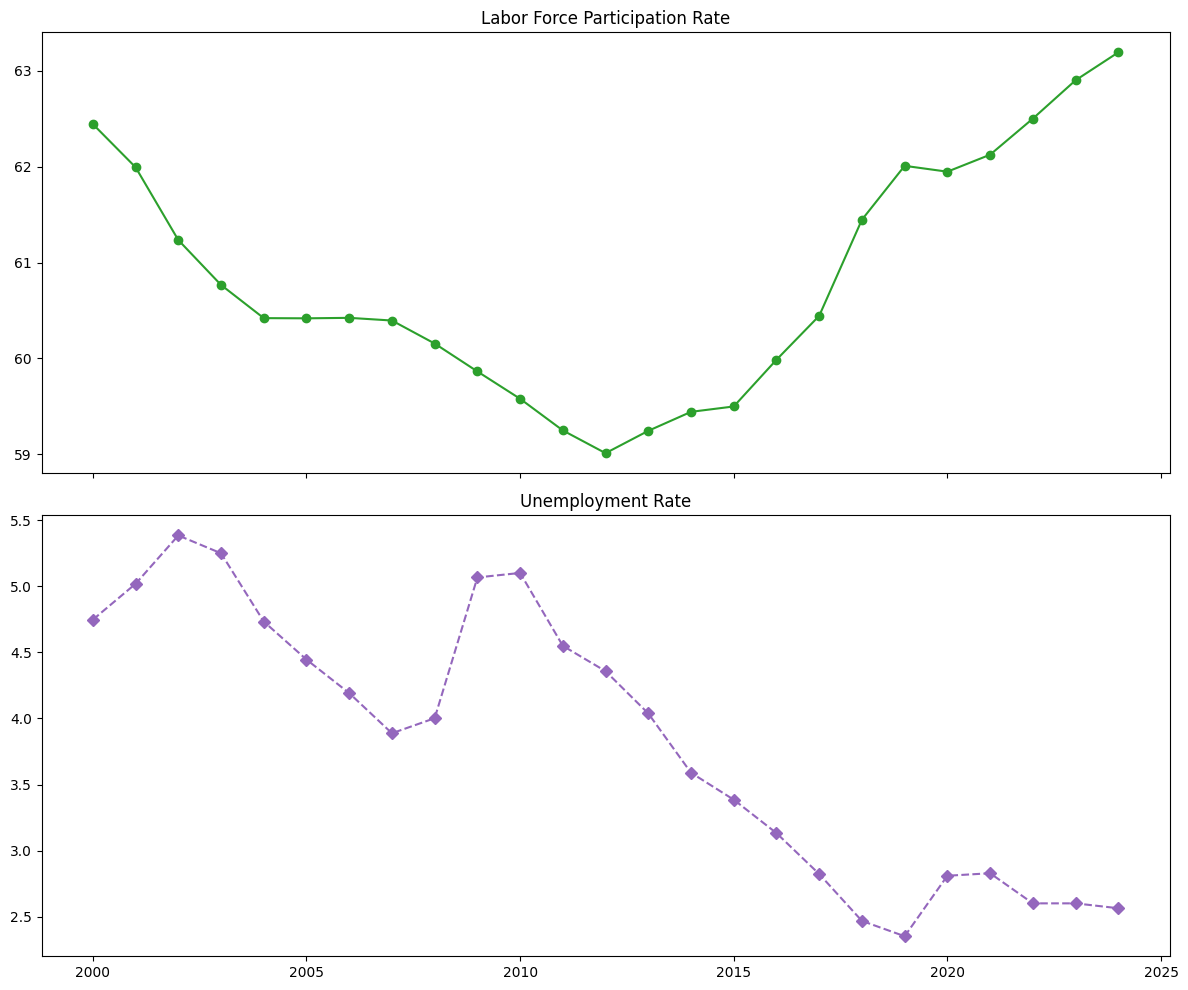

In [54]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_jpn.index, df_jpn['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_jpn.index, df_jpn['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

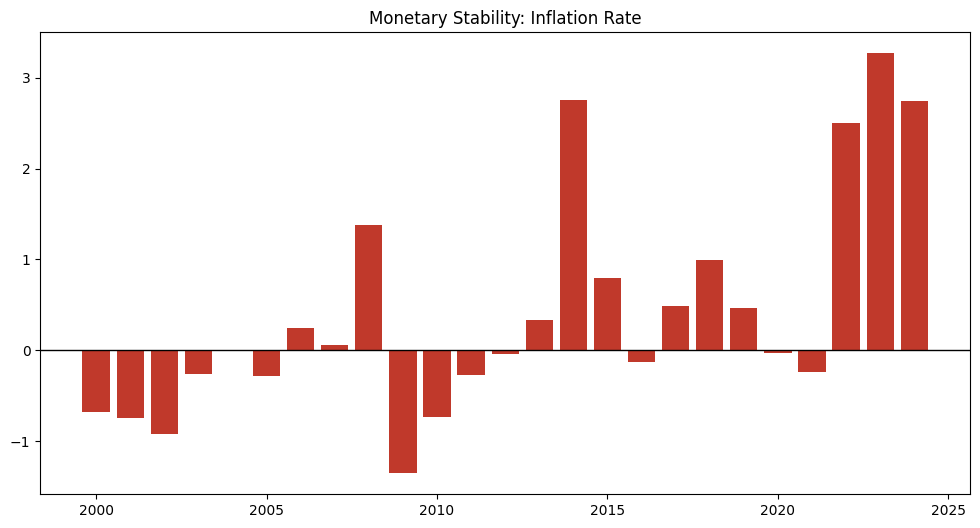

In [55]:
plt.figure(figsize=(12, 6))

plt.bar(df_jpn.index, df_jpn['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

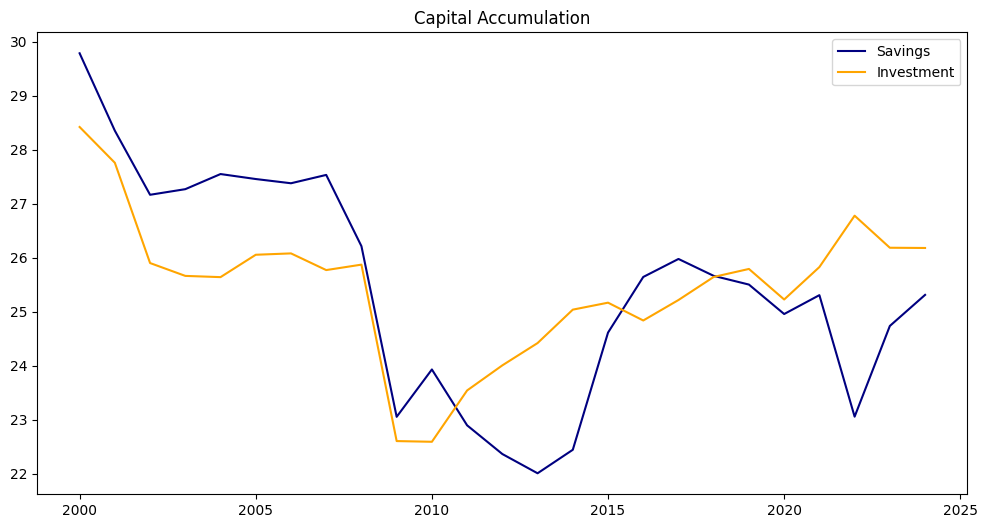

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(df_jpn.index, df_jpn['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_jpn.index, df_jpn['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

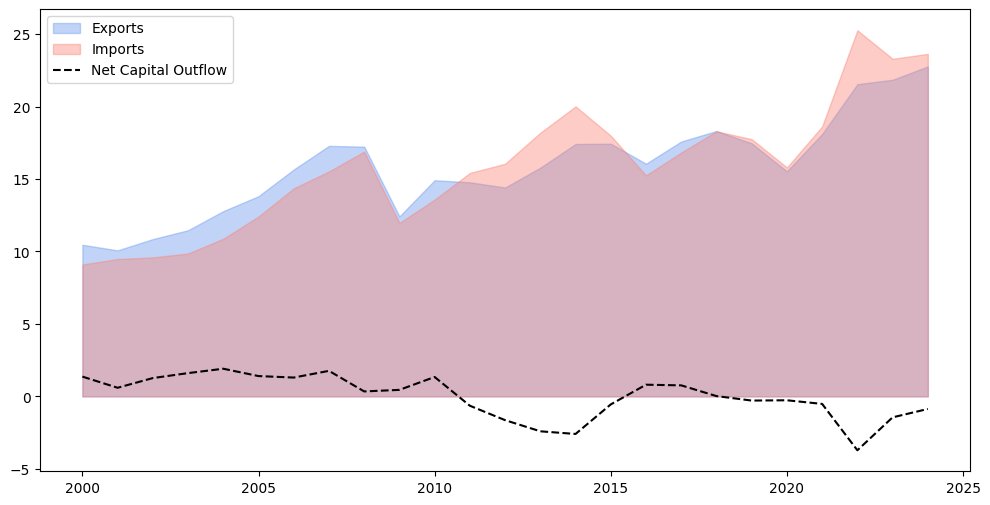

In [57]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_jpn.index, df_jpn['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_jpn.index, df_jpn['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_jpn.index, df_jpn['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

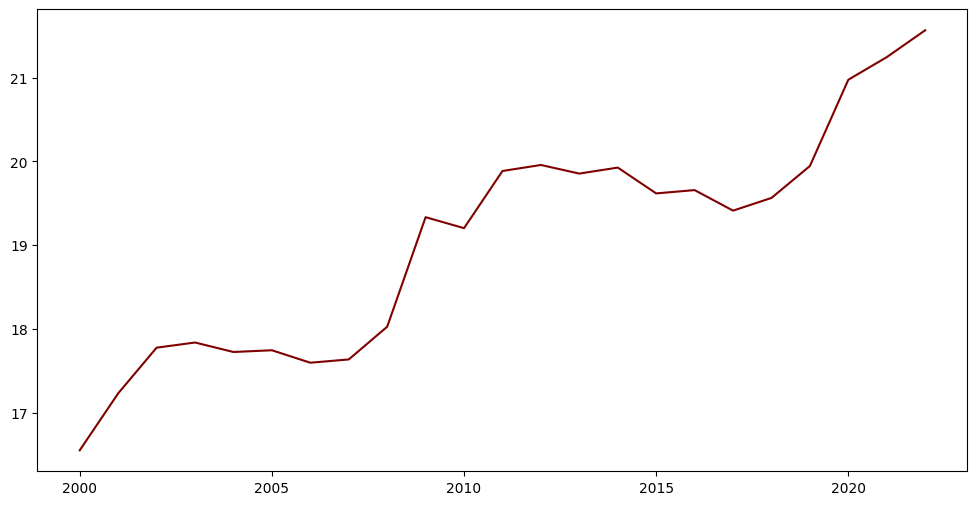

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(df_jpn.index, df_jpn['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_jpn.index, df_jpn['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_jpn.index, df_jpn['Tax_Rev_GDP'], df_jpn['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

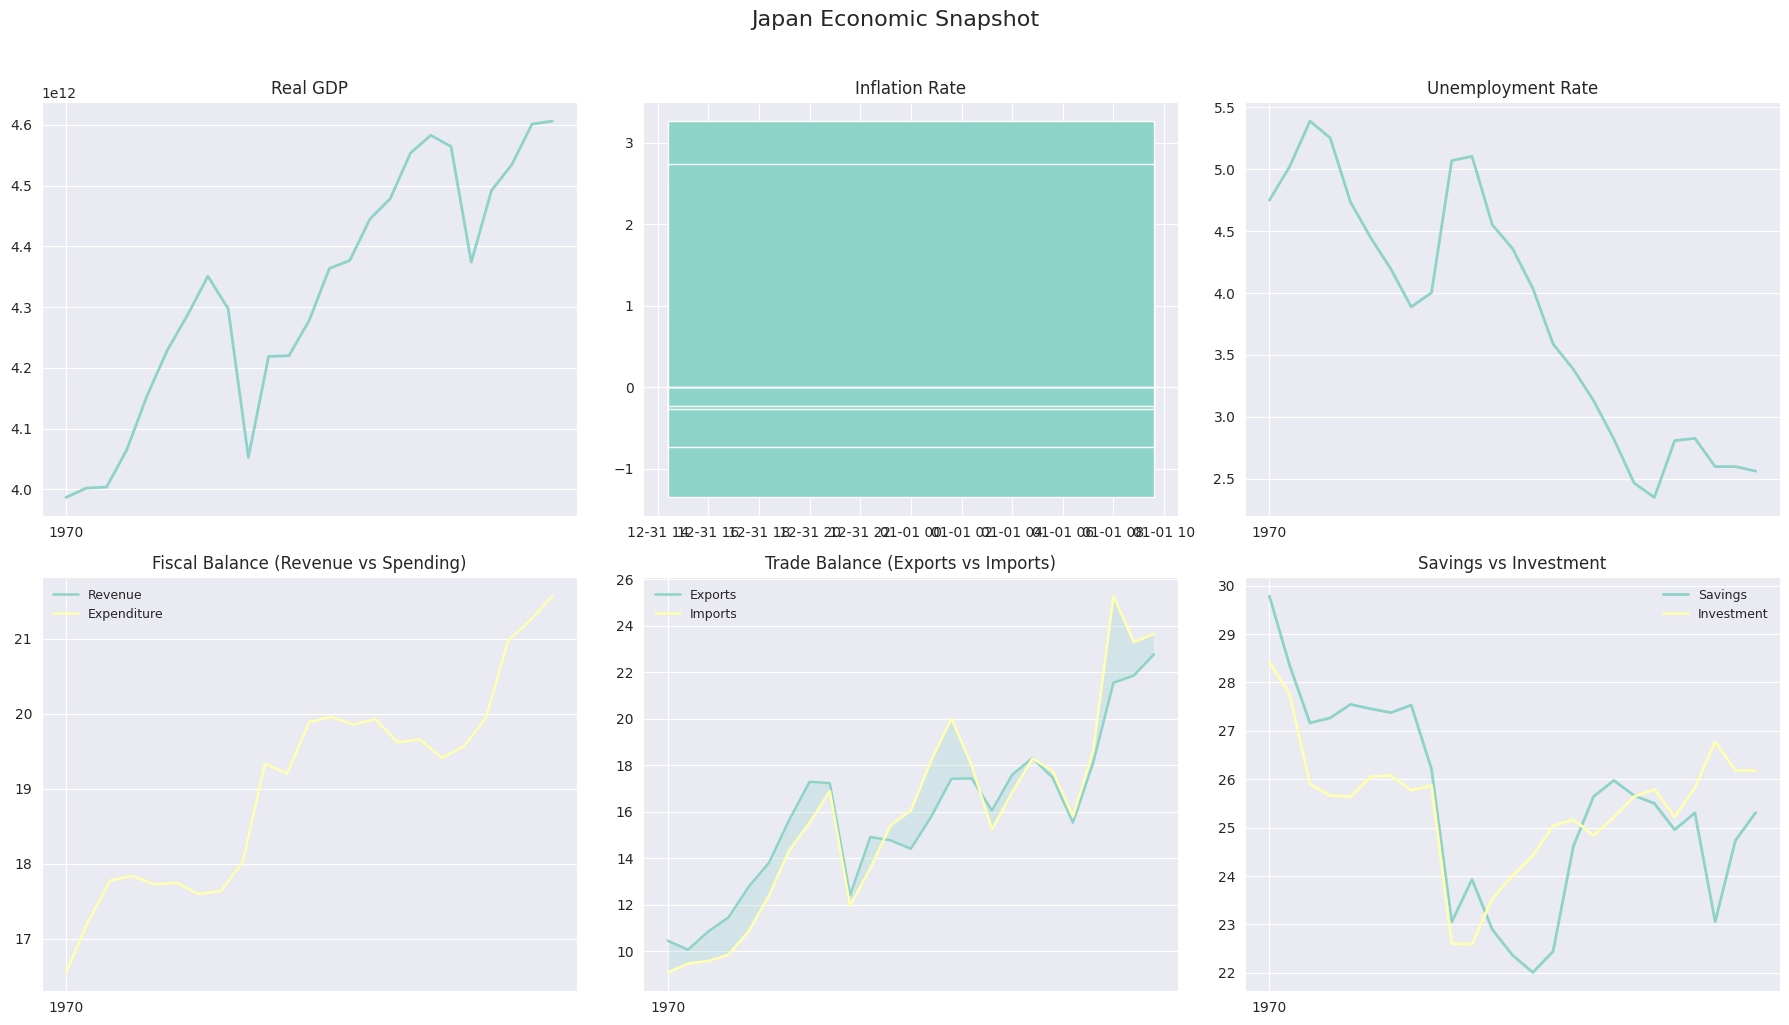

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use("dark_background")
sns.set_style("darkgrid")  # optional, helps with readability

# ---- Choose your dataframe ----
df = df_jpn.copy()

# Safety checks
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)

# Make sure data is sorted
df = df.sort_index()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1) Top Left: Real GDP (line)
ax = axes[0, 0]
ax.plot(df.index, df["GDP_Const"], linewidth=2)
ax.set_title("Real GDP")
ax.set_xlabel("")
ax.set_ylabel("")

# 2) Top Middle: Inflation (bar) + zero line
ax = axes[0, 1]
ax.bar(df.index, df["Inflation_CPI"])
ax.axhline(0, linewidth=1)
ax.set_title("Inflation Rate")
ax.set_xlabel("")
ax.set_ylabel("")

# 3) Top Right: Unemployment (line)
ax = axes[0, 2]
ax.plot(df.index, df["Unemployment_Rate"], linewidth=2)
ax.set_title("Unemployment Rate")
ax.set_xlabel("")
ax.set_ylabel("")

# 4) Bottom Left: Fiscal Balance (fill between revenue & expenditure)
ax = axes[1, 0]
ax.plot(df.index, df["Tax_Rev_GDP"], label="Revenue", linewidth=1.8)
ax.plot(df.index, df["Gov_Exp_GDP"], label="Expenditure", linewidth=1.8)
ax.fill_between(df.index, df["Tax_Rev_GDP"], df["Gov_Exp_GDP"], alpha=0.25)
ax.set_title("Fiscal Balance (Revenue vs Spending)")
ax.set_xlabel("")
ax.legend(frameon=False, fontsize=9)

# 5) Bottom Middle: Trade Balance (fill between exports & imports)
ax = axes[1, 1]
ax.plot(df.index, df["Exports_GDP"], label="Exports", linewidth=1.8)
ax.plot(df.index, df["Imports_GDP"], label="Imports", linewidth=1.8)
ax.fill_between(df.index, df["Exports_GDP"], df["Imports_GDP"], alpha=0.25)
ax.set_title("Trade Balance (Exports vs Imports)")
ax.set_xlabel("")
ax.legend(frameon=False, fontsize=9)

# 6) Bottom Right: Savings vs Investment (dual lines)
ax = axes[1, 2]
ax.plot(df.index, df["Gross_Dom_Savings"], label="Savings", linewidth=2)
ax.plot(df.index, df["Gross_Cap_Formation"], label="Investment", linewidth=2)
ax.set_title("Savings vs Investment")
ax.set_xlabel("")
ax.legend(frameon=False, fontsize=9)

fig.suptitle("Japan Economic Snapshot", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()